<a href="https://colab.research.google.com/github/bilal444hammas/ASSIGNMENT-CH6/blob/master/Advanced_use_of_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6.3  Advanced use of recurrent neural networks

In [ ]:
!rm -R source_data

rm: cannot remove 'source_data': No such file or directory


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip "drive/My Drive/jena_climate_2009_2016.csv.zip"

Archive:  drive/My Drive/jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [ ]:

#!mkdir source_data  
#!mv jena_climate_2009_2016.csv source_data

In [ ]:
#Listing 6.28 Inspecting the data of the Jena weather dataset
import os
data_dir = '/content'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
#read the file
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
#extract the first line
header = lines[0].split(',')
#extract the rest of line
lines = lines[1:]
print(header)
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/jena_climate_2009_2016.csv")
print("Length of dataset :",len(df))
print()
display(df.head())
values = df.iloc[:,1:] # excluded date
float_data = np.asarray(values) # converting in numpy array

Length of dataset : 420551



,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

In [ ]:
#Listing 6.29 Parsing the data
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))# header - 1 mean did not read last colum
for i, line in enumerate(lines):
  #split every line based on comma and save it into numpy arry
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

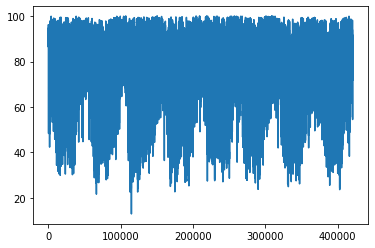

In [ ]:

from matplotlib import pyplot as plt
rh = float_data[:, 4]
plt.plot(range(len(rh)), rh)

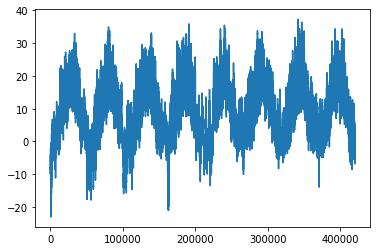

In [ ]:
from matplotlib import pyplot as plt
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

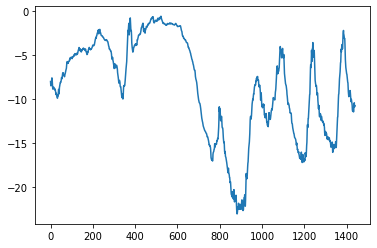

In [ ]:
#Listing 6.31 Plotting the first 10 days of the temperature timeseries
plt.plot(range(1440), temp[:1440])

In [ ]:
#Listing 6.32 Normalizing the data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:

def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None: #None  = if  max data is not specified,we will set it to very end of the data 
        max_index = len(data) - delay - 1 #very end of the data - delay because we predict.
    i = min_index + lookback #set into the very start of the data
    print("fox")
    while 1:
        if shuffle:
          #gernate random rows
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
        lookback // step,
        data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
#Listing 6.34 Preparing the training, validation, and test generators
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [ ]:
train_gen = generator(float_data,lookback=lookback,delay=delay,min_index=0,max_index=200000,shuffle=True,step=step,batch_size=batch_size)
val_gen = generator(float_data,lookback=lookback,delay=delay,min_index=200001,max_index=300000,step=step,batch_size=batch_size)
test_gen = generator(float_data,lookback=lookback,delay=delay,min_index=300001,max_index=None,step=step,batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)// batch_size

test_steps = (len(float_data) - 300001 - lookback)// batch_size

In [ ]:
#Listing 6.35 Computing the common-sense baseline MAE

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()


fox
0.2897359729905486


In [ ]:
celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3360)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                107552    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500, #500
                              epochs=20,           #20
                              validation_data=val_gen,
                              validation_steps=val_steps)



Instructions for updating:
Please use Model.fit, which supports generators.
fox
Epoch 1/20
500/500 [==============================] - 14s 28ms/step - loss: 1.2232 - val_loss: 0.3738
Epoch 2/20
500/500 [==============================] - 14s 27ms/step - loss: 0.3723 - val_loss: 0.3290
Epoch 3/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2868 - val_loss: 0.2923
Epoch 4/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2660 - val_loss: 0.3008
Epoch 5/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2522 - val_loss: 0.3356
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2418 - val_loss: 0.3141
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2360 - val_loss: 0.3382
Epoch 8/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2310 - val_loss: 0.3108
Epoch 9/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2255 - val_loss: 0.3105
Ep

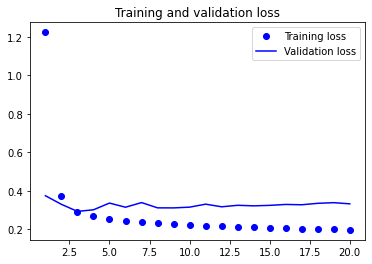

In [ ]:
#Listing 6.38 Plotting results
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
##Listing 6.39 Training and evaluating a GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 29s 59ms/step - loss: 0.3020 - val_loss: 0.2773
Epoch 2/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2860 - val_loss: 0.2730
Epoch 3/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2778 - val_loss: 0.2627
Epoch 4/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2740 - val_loss: 0.2625
Epoch 5/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2687 - val_loss: 0.2704
Epoch 6/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2659 - val_loss: 0.2629
Epoch 7/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2604 - val_loss: 0.2639
Epoch 8/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2565 - val_loss: 0.2711
Epoch 9/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2539 - val_loss: 0.2720
Epoch 10/20
500/500 [==============================] - 29s 58ms/step - loss: 0.248

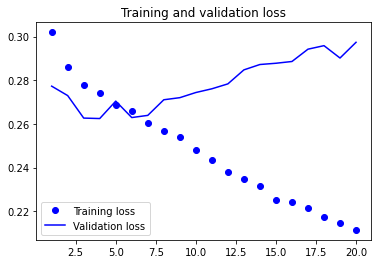

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
##Listing 6.40 Training and evaluating a dropout-regularized GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
model.summary
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,
                              validation_data=val_gen,validation_steps=val_steps)

In [ ]:
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,
                              validation_data=val_gen,validation_steps=val_steps)

In [ ]:
#Listing 6.41 Training and evaluating a dropout-regularized, stacked GRU model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

model.summary


In [ ]:
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
#Listing 6.42 Training and evaluating an LSTM using reversed sequences


from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]


x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

In [ ]:
#Listing 6.43 Training and evaluating a bidirectional LSTM
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)


In [ ]:
#Listing 6.44 Training a bidirectional GRU
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Bidirectional(
layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=40,
validation_data=val_gen,
validation_steps=val_steps)

In [ ]:
#Listing 6.45 Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

In [ ]:
#Listing 6.46 Training and evaluating a simple 1D convnet on the IMDB data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

In [ ]:
#Listing 6.47 Training and evaluating a simple 1D convnet on the Jena data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=20,
validation_data=val_gen,
validation_steps=val_steps)

In [ ]:
#Listing 6.48 Preparing higher-resolution data generators for the Jena dataset
step = 3
lookback = 720
delay = 144


train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=200000,
shuffle=True,
step=step)
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=200001,
max_index=300000,
step=step)
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=300001,
max_index=None,
step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 12

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=20,
validation_data=val_gen,
validation_steps=val_steps)